In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/drive/My Drive/Foods'
CATEGORIES=['Healthy Food','Unhealthy Food']
for category in CATEGORIES:
    class_num=CATEGORIES.index(category) #label encoding
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        #print(img_array)
        #plt.imshow(img_array)
        img_resized=resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data= np.array(flat_data)
target=np.array(target)
images=np.array(images)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3538944 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33555456 bytes but only got 0. Skipping tag 59392
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2621440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0


In [4]:
flat_data

array([[0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.48235294, 0.53333333, 0.59607843, ..., 0.90980392, 0.92156863,
        0.94117647],
       [0.50980392, 0.67058824, 0.78627451, ..., 0.63431373, 0.70686275,
        0.79607843],
       ...,
       [0.        , 0.00784314, 0.01960784, ..., 0.21711111, 0.17566013,
        0.06666667],
       [0.06026501, 0.01487582, 0.        , ..., 0.16203686, 0.09732383,
        0.00937255],
       [0.65031373, 0.72745098, 0.7172549 , ..., 0.4032549 , 0.28247059,
        0.22992157]])

In [5]:
#training and testing splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [8]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
accuracy_score(y_pred,y_test)

0.7357512953367875

In [11]:
confusion_matrix(y_pred,y_test)

array([[85, 28],
       [23, 57]])

In [12]:
import pickle
pickle.dump(clf,open('food_model.p','wb'))

In [13]:
import pickle
model=pickle.load(open('food_model.p','rb'))

Enter image url: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSEBxaMLDP5WMVMo1i0oEkN1DqFKdCmjfMzbg&usqp=CAU
(183, 275, 3)
 Predicted Output: Unhealthy Food


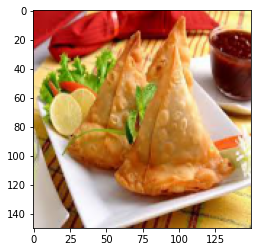

In [14]:
#testing new image
flat_data=[]
url=input('Enter image url: ')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f' Predicted Output: {y_out}')

In [15]:
!pip install pyngrok==4.1.1
from pyngrok import ngrok


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15971 sha256=eb2502a3779683b8ffa2ace94b2a9dc6f12ba3458fced6c6a2f8fe8c269d2a92
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [16]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import pickle
st.title('Check Your Food -> Healthy or Not!!')
st.text("Upload the Image")
model=pickle.load(open('food_model.p','rb'))
uploaded_file=st.file_uploader("Choose Image: ", type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Image Uploaded')

  if st.button('PREDICT'):
    CATEGORIES=['Healthy Food','Unhealthy Food']
    st.write('RESULT-> ')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f' Predicted Output: {y_out}')
    q=model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
	    st.write(f'{item} : {q[0][index]*100}')

Writing app.py


In [18]:
!pip install streamlit

     |████████████████████████████████| 7.4MB 8.1MB/s 
     |████████████████████████████████| 163kB 44.9MB/s 
     |████████████████████████████████| 4.5MB 49.0MB/s 
     |████████████████████████████████| 6.9MB 46.6MB/s 
     |████████████████████████████████| 112kB 43.0MB/s 
     |████████████████████████████████| 133kB 47.5MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 122kB 43.8MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=1dea1040c825eccbd48569ec34057b24d1f92cf5852899283a67d005c3aed5a7
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.4-cp36-none-any.whl size=74841 sha256=59572e4615fcbf5d607295115060426032f8e89e1cc761b6c9f5c675bb4ed841
  Stored in directory: /root/.c

In [19]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url


nohup: appending output to 'nohup.out'


t=2020-11-26T10:52:17+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=3c6441d6253cd26a err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[https://ddb94c3a5334.ngrok.io http://ddb94c3a5334.ngrok.io]\n\r\n\r\nERR_NGROK_324\r\n"



PyngrokNgrokHTTPError: ignored